In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

### Prepare data

In [2]:
# Read in shot data
df = pd.read_pickle('merge_df.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gamedate             541 non-null    datetime64[ns]
 1   topkey3              541 non-null    int64         
 2   rcorner3             541 non-null    int64         
 3   lcorner3             541 non-null    int64         
 4   paint                541 non-null    int64         
 5   3pt                  541 non-null    int64         
 6   2pt                  541 non-null    int64         
 7   SHOT_ATTEMPTED_FLAG  541 non-null    int64         
 8   pts                  541 non-null    int64         
 9   team                 541 non-null    object        
 10  HTM                  541 non-null    object        
 11  VTM                  541 non-null    object        
 12  season               541 non-null    int64         
 13  p_topkey3            541 non-null  

In [4]:
# Narrow down data; season21 is reference category
new_df = df.drop(['gamedate', 'topkey3', 'rcorner3', 'lcorner3', 'paint', '3pt', '2pt', 'season', 'opponent', 
                  'SHOT_ATTEMPTED_FLAG', 'HTM', 'VTM', 'team', 'season21'], axis=1)

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pts               541 non-null    int64  
 1   p_topkey3         541 non-null    float64
 2   p_rcorner3        541 non-null    float64
 3   p_lcorner3        541 non-null    float64
 4   p_paint           541 non-null    float64
 5   r_outside_inside  541 non-null    float64
 6   season04          541 non-null    int64  
 7   season05          541 non-null    int64  
 8   season06          541 non-null    int64  
 9   season07          541 non-null    int64  
 10  season08          541 non-null    int64  
 11  season09          541 non-null    int64  
 12  season10          541 non-null    int64  
 13  season11          541 non-null    int64  
 14  season12          541 non-null    int64  
 15  season13          541 non-null    int64  
 16  season14          541 non-null    int64  
 1

In [6]:
missing = new_df[new_df.win_prev.isnull()]
missing

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev
11,17,0.208333,0.041667,0.000000,0.041667,0.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
13,8,0.307692,0.000000,0.000000,0.076923,0.444444,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
20,19,0.166667,0.000000,0.000000,0.166667,0.200000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
23,5,0.333333,0.000000,0.333333,0.000000,2.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
41,11,0.272727,0.000000,0.000000,0.272727,0.375000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
47,8,0.100000,0.000000,0.100000,0.300000,0.250000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
51,7,0.285714,0.000000,0.000000,0.142857,0.400000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
61,16,0.666667,0.000000,0.111111,0.111111,3.500000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
68,26,0.272727,0.000000,0.000000,0.090909,0.375000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
90,20,0.428571,0.000000,0.047619,0.190476,0.909091,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN


Null values for opponent's first year as franchise. Impute with 0.50 as win percentage for previous year

In [7]:
# Impute 0.50 for missing win_prev
new_df['win_prev'] = new_df['win_prev'].fillna(0.50)

In [8]:
new_df[new_df.win_prev.isnull()]

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev


In [9]:
new_df.describe()

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,17.223660,0.472014,0.010594,0.019100,0.103122,inf,0.060998,0.060998,0.060998,0.075786,...,0.068392,0.014787,0.068392,0.075786,0.070240,0.066543,0.073937,0.011091,0.038817,0.524313
std,10.518409,0.172370,0.035574,0.039873,0.089330,NaN,0.239548,0.239548,0.239548,0.264900,...,0.252651,0.120813,0.252651,0.264900,0.255788,0.249460,0.261911,0.104823,0.193337,0.151560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088235
25%,11.000000,0.333333,0.000000,0.000000,0.041667,0.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.441176
50%,16.000000,0.454545,0.000000,0.000000,0.090909,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529412
75%,21.000000,0.588235,0.000000,0.000000,0.153846,1.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.617647
max,81.000000,1.000000,0.500000,0.333333,0.428571,inf,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.823529


In [10]:
# outside-inside ratio is infinity when inside shots are 0
new_df.loc[new_df.r_outside_inside == np.inf]

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev
365,0,1.0,0.0,0.0,0.0,inf,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.500000
460,18,1.0,0.0,0.0,0.0,inf,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.235294
491,0,1.0,0.0,0.0,0.0,inf,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.676471


In [11]:
# Only 3 rows with this issue, so dropping from data
new_df.replace(np.inf, np.nan, inplace=True)
new_df.dropna(inplace=True)

In [12]:
# Since I'll be doing log transformation on y, check to see if pts are ever 0
new_df['pts'].describe()

count    538.000000
mean      17.286245
std       10.495004
min        0.000000
25%       11.000000
50%       16.000000
75%       21.000000
max       81.000000
Name: pts, dtype: float64

In [13]:
new_df[new_df['pts']==0]

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev
59,0,0.400000,0.0,0.0,0.0,0.666667,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.500000
488,0,0.750000,0.0,0.0,0.0,3.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.617647
490,0,0.571429,0.0,0.0,0.0,1.333333,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.205882


In [14]:
# Drop those 3 rows
new_df['pts'].replace(0, np.nan, inplace=True)
new_df.dropna(inplace=True)

In [15]:
new_df.describe()

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,17.383178,0.468482,0.010713,0.019314,0.104279,1.424448,0.061682,0.059813,0.061682,0.076636,...,0.069159,0.014953,0.069159,0.074766,0.071028,0.067290,0.072897,0.005607,0.039252,0.525081
std,10.443933,0.168208,0.035755,0.040044,0.089156,1.570726,0.240803,0.237362,0.240803,0.266261,...,0.253962,0.121479,0.253962,0.263260,0.257112,0.250758,0.260211,0.074743,0.194376,0.151062
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088235
25%,11.000000,0.333333,0.000000,0.000000,0.047619,0.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.441176
50%,16.000000,0.454545,0.000000,0.000000,0.090909,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529412
75%,21.000000,0.583333,0.000000,0.000000,0.153846,1.612500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.617647
max,81.000000,0.933333,0.500000,0.333333,0.428571,14.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.823529


### Visualizing correlations

In [16]:
# Correlations matrix
new_df.corr()

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,season04,season05,season06,season07,...,season11,season12,season13,season14,season16,season17,season18,season19,season20,win_prev
pts,1.000000,-0.010313,-0.069066,0.029657,-0.010880,-0.032889,-0.069730,-0.113509,0.083662,0.076965,...,0.001287,-0.079802,0.016819,0.099899,-0.027589,-0.044187,0.048274,-0.103515,-0.064616,0.168479
p_topkey3,-0.010313,1.000000,-0.090129,-0.082723,-0.385366,0.751147,-0.208625,-0.120553,-0.037321,0.117391,...,-0.127175,0.020523,-0.081862,-0.106567,0.077352,0.145912,0.180209,-0.006540,0.258006,0.045205
p_rcorner3,-0.069066,-0.090129,1.000000,-0.016693,-0.077208,0.105999,-0.026240,-0.017414,-0.021912,0.016087,...,0.071426,0.250477,-0.041428,0.010665,0.010465,-0.051708,-0.058017,0.152662,-0.006728,-0.046393
p_lcorner3,0.029657,-0.082723,-0.016693,1.000000,-0.007901,0.090717,0.097212,0.078559,-0.037330,0.023604,...,0.019807,-0.059481,-0.041597,0.033475,0.060703,-0.004825,-0.025032,-0.036253,-0.083430,0.014239
p_paint,-0.010880,-0.385366,-0.077208,-0.007901,1.000000,-0.308507,0.109068,0.054220,0.019859,-0.120584,...,0.096180,-0.046548,0.017398,-0.070995,-0.052389,-0.112041,-0.145456,-0.044680,-0.021100,-0.007598
r_outside_inside,-0.032889,0.751147,0.105999,0.090717,-0.308507,1.000000,-0.124839,-0.076706,-0.077322,0.038997,...,-0.064291,0.046824,-0.088783,-0.077304,0.057285,0.129576,0.101279,0.003995,0.209351,0.019604
season04,-0.069730,-0.208625,-0.026240,0.097212,0.109068,-0.124839,1.000000,-0.064669,-0.065737,-0.073864,...,-0.069886,-0.031590,-0.069886,-0.072884,-0.070896,-0.068866,-0.071895,-0.019254,-0.051824,0.046725
season05,-0.113509,-0.120553,-0.017414,0.078559,0.054220,-0.076706,-0.064669,1.000000,-0.064669,-0.072664,...,-0.068751,-0.031076,-0.068751,-0.071700,-0.069744,-0.067747,-0.070727,-0.018941,-0.050982,-0.006586
season06,0.083662,-0.037321,-0.021912,-0.037330,0.019859,-0.077322,-0.065737,-0.064669,1.000000,-0.073864,...,-0.069886,-0.031590,-0.069886,-0.072884,-0.070896,-0.068866,-0.071895,-0.019254,-0.051824,0.024960
season07,0.076965,0.117391,0.016087,0.023604,-0.120584,0.038997,-0.073864,-0.072664,-0.073864,1.000000,...,-0.078526,-0.035495,-0.078526,-0.081895,-0.079660,-0.077380,-0.080783,-0.021634,-0.058231,0.024700


<AxesSubplot:>

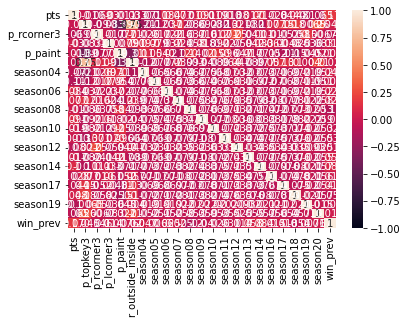

In [17]:
# Heat map
sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1)

In [18]:
# Drop the season dummies and t_attempts (leakage)
df_nodummy = new_df[['pts', 'p_topkey3', 'p_rcorner3', 'p_lcorner3', 'p_paint', 'r_outside_inside', 'win_prev']]

In [19]:
df_nodummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 540
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pts               535 non-null    float64
 1   p_topkey3         535 non-null    float64
 2   p_rcorner3        535 non-null    float64
 3   p_lcorner3        535 non-null    float64
 4   p_paint           535 non-null    float64
 5   r_outside_inside  535 non-null    float64
 6   win_prev          535 non-null    float64
dtypes: float64(7)
memory usage: 33.4 KB


In [20]:
df_nodummy.corr()

,pts,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,win_prev
pts,1.000000,-0.010313,-0.069066,0.029657,-0.010880,-0.032889,0.168479
p_topkey3,-0.010313,1.000000,-0.090129,-0.082723,-0.385366,0.751147,0.045205
p_rcorner3,-0.069066,-0.090129,1.000000,-0.016693,-0.077208,0.105999,-0.046393
p_lcorner3,0.029657,-0.082723,-0.016693,1.000000,-0.007901,0.090717,0.014239
p_paint,-0.010880,-0.385366,-0.077208,-0.007901,1.000000,-0.308507,-0.007598
r_outside_inside,-0.032889,0.751147,0.105999,0.090717,-0.308507,1.000000,0.019604
win_prev,0.168479,0.045205,-0.046393,0.014239,-0.007598,0.019604,1.000000


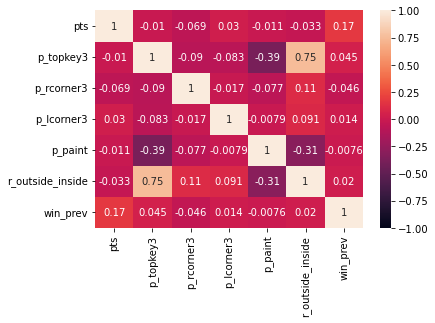

In [21]:
sns.heatmap(df_nodummy.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('wnba_heatmap1.png')

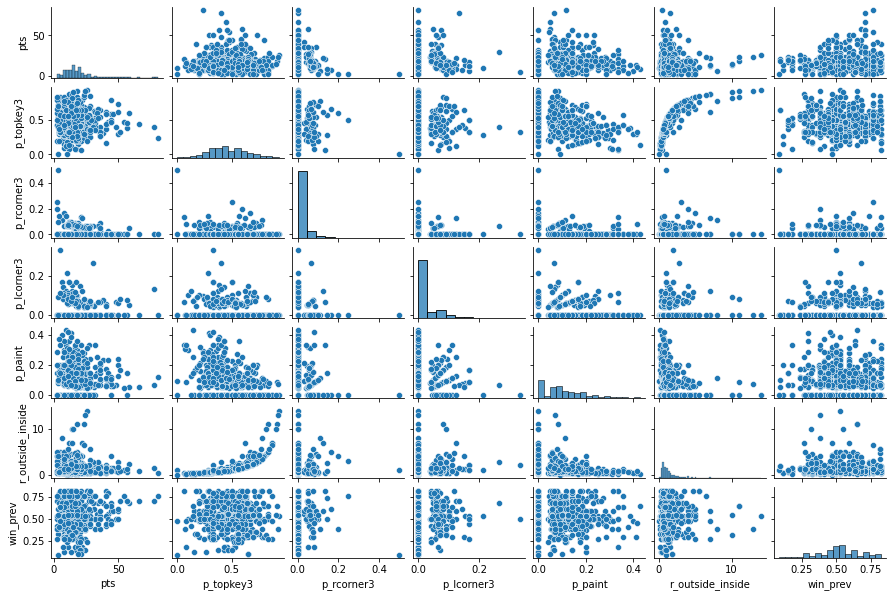

In [22]:
# Scatter plots
sns.pairplot(df_nodummy, height=1.2, aspect=1.5)
plt.savefig('wnba_scatter1.png')

Non-linear relationships between target and feature variables. outside-inside ratio and top of key vars might have some collinearity. Need to transform all features and possible pick between those two.

### Model

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

In [24]:
# statsmodels OLS baseline, season21 is reference category
X, y = new_df.drop(columns='pts'), new_df['pts']
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    pts   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.005
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           7.00e-06
Time:                        18:54:30   Log-Likelihood:                -1981.3
No. Observations:                 535   AIC:                             4009.
Df Residuals:                     512   BIC:                             4107.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.1292      3.532  

In [25]:
# Log transform y
new_df['log_pts'] = np.log(new_df['pts'])

In [26]:
# Update statsmodels OLS
X, y = new_df.drop(columns=['pts', 'log_pts']), new_df['log_pts']
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                log_pts   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.802
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.41e-08
Time:                        18:54:30   Log-Likelihood:                -451.86
No. Observations:                 535   AIC:                             949.7
Df Residuals:                     512   BIC:                             1048.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1077      0.203  

R-squared goes up a little from 0.114 to 0.140

Now, using polynomial transformations on feature variables. Since PolynomialFeatures will create combos for all the features, I will temporarily remove the season dummies except for the seasons when she broke scoring records or the team made it to playoff finals

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X_nodummy = X[['p_topkey3', 'p_rcorner3', 'p_lcorner3', 'p_paint', 'r_outside_inside', 'win_prev', 
               'season06', 'season07', 'season09', 'season14']]

In [113]:
# One more statsmodels OLS
X, y = X_nodummy, new_df['log_pts']
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                log_pts   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.654
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           9.91e-05
Time:                        21:00:18   Log-Likelihood:                -474.30
No. Observations:                 535   AIC:                             970.6
Df Residuals:                     524   BIC:                             1018.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4742      0.149  

In [29]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_nodummy)
X_poly_names = poly.get_feature_names_out()

In [30]:
# Create dataframe from poly array
X_poly = pd.DataFrame(X_poly, columns=X_poly_names)

In [31]:
X_poly.head()

,1,p_topkey3,p_rcorner3,p_lcorner3,p_paint,r_outside_inside,win_prev,season06,season07,season09,...,season06^2,season06 season07,season06 season09,season06 season14,season07^2,season07 season09,season07 season14,season09^2,season09 season14,season14^2
0,1.0,0.461538,0.000000,0.000000,0.153846,0.857143,0.558824,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.333333,0.066667,0.066667,0.200000,0.875000,0.529412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.357143,0.000000,0.000000,0.071429,0.555556,0.529412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.416667,0.000000,0.000000,0.166667,0.714286,0.588235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.400000,0.000000,0.000000,0.100000,0.666667,0.529412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Partition the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [33]:
# sklearn linear regression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_val, y_val))
list(zip(X_train.columns, reg.coef_))

0.29526658844210973
0.1016642856515344


[('1', -2.7692777444569076e-12),
 ('p_topkey3', 3.1047606918481754),
 ('p_rcorner3', 13.061940422903742),
 ('p_lcorner3', 8.036979887874494),
 ('p_paint', 3.091005995595258),
 ('r_outside_inside', -1.0387030769374506),
 ('win_prev', -1.6554712101177305),
 ('season06', 1.1691091214294638),
 ('season07', -0.5024933057793335),
 ('season09', -0.012250548722684385),
 ('season14', -0.47014221162541014),
 ('p_topkey3^2', -1.0657949206472312),
 ('p_topkey3 p_rcorner3', -19.680602593038955),
 ('p_topkey3 p_lcorner3', 6.26524890190163),
 ('p_topkey3 p_paint', -0.7467238158319016),
 ('p_topkey3 r_outside_inside', 0.790308316237804),
 ('p_topkey3 win_prev', -1.995066713901982),
 ('p_topkey3 season06', -11.271573797264368),
 ('p_topkey3 season07', 3.468930432392569),
 ('p_topkey3 season09', 0.6078836009629969),
 ('p_topkey3 season14', 2.019324533018678),
 ('p_rcorner3^2', -71.74710307413905),
 ('p_rcorner3 p_lcorner3', -26.409896283621755),
 ('p_rcorner3 p_paint', 7.6934844093949755),
 ('p_rcorner3

In [34]:
# Standardize features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train).astype(float)
X_scaled_val = scaler.transform(X_val).astype(float)
X_scaled_test = scaler.transform(X_test).astype(float)

In [35]:
X_scaled_names = scaler.get_feature_names_out()
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_scaled_names)

X_scaled_val = pd.DataFrame(X_scaled_val, columns=X_scaled_names)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_scaled_names)

In [36]:
from sklearn.linear_model import Lasso, LassoCV

In [37]:
# Lasso
lasso_model = Lasso(alpha=0.002, max_iter=5000)
lasso_model.fit(X_scaled_train, y_train)

Lasso(alpha=0.002, max_iter=5000)

In [38]:
list(zip(X_scaled_train.columns, lasso_model.coef_))

[('1', 0.0),
 ('p_topkey3', 0.050289835585566836),
 ('p_rcorner3', 0.09563392490459142),
 ('p_lcorner3', 0.17074126105643475),
 ('p_paint', 0.23710337569520068),
 ('r_outside_inside', -0.08689019208723803),
 ('win_prev', -0.11611442674582008),
 ('season06', 0.04594997736375141),
 ('season07', 0.0),
 ('season09', -0.0),
 ('season14', -0.0),
 ('p_topkey3^2', -0.019346027626024925),
 ('p_topkey3 p_rcorner3', -0.0),
 ('p_topkey3 p_lcorner3', 0.04152898054334475),
 ('p_topkey3 p_paint', 0.0),
 ('p_topkey3 r_outside_inside', -0.0),
 ('p_topkey3 win_prev', 0.011012130560656738),
 ('p_topkey3 season06', -0.0),
 ('p_topkey3 season07', 0.11375714943125295),
 ('p_topkey3 season09', 0.026270860507309406),
 ('p_topkey3 season14', 0.02231470898121858),
 ('p_rcorner3^2', -0.19671082858214878),
 ('p_rcorner3 p_lcorner3', 0.00860652590162588),
 ('p_rcorner3 p_paint', 0.04164876930306326),
 ('p_rcorner3 r_outside_inside', 0.0003007060281836948),
 ('p_rcorner3 win_prev', 0.0),
 ('p_rcorner3 season06', 0.

In [39]:
print(lasso_model.score(X_scaled_train, y_train))

0.2702446478642556


In [40]:
print(lasso_model.score(X_scaled_val, y_val))

0.19965537306430892


In [41]:
alphas = np.logspace(-4, 0, 20)
print(alphas)

[1.00000000e-04 1.62377674e-04 2.63665090e-04 4.28133240e-04
 6.95192796e-04 1.12883789e-03 1.83298071e-03 2.97635144e-03
 4.83293024e-03 7.84759970e-03 1.27427499e-02 2.06913808e-02
 3.35981829e-02 5.45559478e-02 8.85866790e-02 1.43844989e-01
 2.33572147e-01 3.79269019e-01 6.15848211e-01 1.00000000e+00]


In [42]:
train_scores = []
val_scores = []
test_scores = []
for i in alphas:
    lasso_model = Lasso(alpha=i, max_iter=5000)
    lasso_model.fit(X_scaled_train, y_train)
    
    train_scores.append(lasso_model.score(X_scaled_train, y_train))
    val_scores.append(lasso_model.score(X_scaled_val, y_val))

/Users/melanieackerman/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+00, tolerance: 1.104e-02
  model = cd_fast.enet_coordinate_descent(
/Users/melanieackerman/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.789e-02, tolerance: 1.104e-02
  model = cd_fast.enet_coordinate_descent(


In [43]:
print(train_scores)

[0.2943509668190336, 0.2932328100762499, 0.2919854378662129, 0.29045640712830456, 0.2870568214543662, 0.2814488430194588, 0.27203174895601356, 0.26000310934683724, 0.24733839161228077, 0.2292693855443041, 0.19954398894404002, 0.16378915058607035, 0.11982481569771564, 0.07416916823119513, 0.025101303226160998, 0.0, 0.0, 0.0, 0.0, 0.0]


In [44]:
print(val_scores)

[0.13194009856266076, 0.14538982836456493, 0.1604904386895062, 0.17966579920645664, 0.1975623022961034, 0.2049068828896754, 0.20205226424267697, 0.1940973144569057, 0.1975777543804933, 0.2001496490257021, 0.1647842022112932, 0.09593737937925784, 0.06988813010441475, 0.055595056153357136, 0.02135456514183609, -0.008574213154524779, -0.008574213154524779, -0.008574213154524779, -0.008574213154524779, -0.008574213154524779]


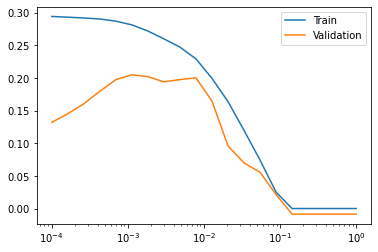

In [45]:
plt.semilogx(alphas, train_scores, label='Train')
plt.semilogx(alphas, val_scores, label='Validation')
plt.legend()

In [46]:
# Lasso using optimal alpha from above tuning
lasso_model = Lasso(alpha=0.008, max_iter=5000)
lasso_model.fit(X_scaled_train, y_train)

Lasso(alpha=0.008, max_iter=5000)

In [47]:
lasso_results = list(zip(X_scaled_train.columns, lasso_model.coef_))
lasso_results

[('1', 0.0),
 ('p_topkey3', -0.0),
 ('p_rcorner3', 0.011034950426925389),
 ('p_lcorner3', 0.04176875081809868),
 ('p_paint', 0.06275861798691638),
 ('r_outside_inside', -0.0),
 ('win_prev', 0.0),
 ('season06', 0.012758146500831201),
 ('season07', 0.0),
 ('season09', 0.0),
 ('season14', -0.0),
 ('p_topkey3^2', -0.046781475552686254),
 ('p_topkey3 p_rcorner3', 0.0),
 ('p_topkey3 p_lcorner3', 0.06302295219984824),
 ('p_topkey3 p_paint', 0.0024018790916485494),
 ('p_topkey3 r_outside_inside', -0.0),
 ('p_topkey3 win_prev', 0.0),
 ('p_topkey3 season06', 0.0),
 ('p_topkey3 season07', 0.0),
 ('p_topkey3 season09', 0.0071708274837032635),
 ('p_topkey3 season14', 0.0),
 ('p_rcorner3^2', -0.14510629863132343),
 ('p_rcorner3 p_lcorner3', 0.018299086272232146),
 ('p_rcorner3 p_paint', 0.043428133804784164),
 ('p_rcorner3 r_outside_inside', -0.0),
 ('p_rcorner3 win_prev', 0.0),
 ('p_rcorner3 season06', 0.031435478670634134),
 ('p_rcorner3 season07', 0.07688771688721048),
 ('p_rcorner3 season09', 0.

In [48]:
# Drop features that were pushed to zero
cols_drop = []
for tup in lasso_results:
    if abs(tup[1]) < 10**(-5):
        cols_drop.append(tup[0])
cols_drop        

['1',
 'p_topkey3',
 'r_outside_inside',
 'win_prev',
 'season07',
 'season09',
 'season14',
 'p_topkey3 p_rcorner3',
 'p_topkey3 r_outside_inside',
 'p_topkey3 win_prev',
 'p_topkey3 season06',
 'p_topkey3 season07',
 'p_topkey3 season14',
 'p_rcorner3 r_outside_inside',
 'p_rcorner3 win_prev',
 'p_rcorner3 season09',
 'p_rcorner3 season14',
 'p_lcorner3 r_outside_inside',
 'p_lcorner3 win_prev',
 'p_lcorner3 season09',
 'p_paint season06',
 'p_paint season07',
 'r_outside_inside win_prev',
 'r_outside_inside season06',
 'r_outside_inside season07',
 'win_prev season07',
 'win_prev season09',
 'season06^2',
 'season06 season07',
 'season06 season09',
 'season06 season14',
 'season07^2',
 'season07 season09',
 'season07 season14',
 'season09^2',
 'season09 season14',
 'season14^2']

In [49]:
X_scaled_train2 = X_scaled_train.drop(columns=cols_drop)
X_scaled_val2 = X_scaled_val.drop(columns=cols_drop)
X_scaled_test2 = X_scaled_test.drop(columns=cols_drop)

In [50]:
# Lasso using optimal alpha from above tuning
lasso_model = Lasso(alpha=0.006, max_iter=5000)
lasso_model.fit(X_scaled_train2, y_train)

Lasso(alpha=0.006, max_iter=5000)

In [51]:
lasso_results = list(zip(X_scaled_train2.columns, lasso_model.coef_))
lasso_results

[('p_rcorner3', 0.030023837597753494),
 ('p_lcorner3', 0.0822327985918322),
 ('p_paint', 0.11326496735747667),
 ('season06', 0.011924707998967471),
 ('p_topkey3^2', -0.03596922077980975),
 ('p_topkey3 p_lcorner3', 0.057075666294170414),
 ('p_topkey3 p_paint', 0.015859069870945434),
 ('p_topkey3 season09', 0.009130633017811024),
 ('p_rcorner3^2', -0.1594735204958447),
 ('p_rcorner3 p_lcorner3', 0.01612366055613326),
 ('p_rcorner3 p_paint', 0.045078067579833105),
 ('p_rcorner3 season06', 0.0324889813776755),
 ('p_rcorner3 season07', 0.07547061120081888),
 ('p_lcorner3^2', -0.13103044673055728),
 ('p_lcorner3 p_paint', -0.039953995984051624),
 ('p_lcorner3 season06', 0.006091235904743301),
 ('p_lcorner3 season07', 0.05978940699084145),
 ('p_lcorner3 season14', 0.02923706908241964),
 ('p_paint^2', -0.1585728621175232),
 ('p_paint r_outside_inside', -0.08463295977887902),
 ('p_paint win_prev', 0.02951448031339135),
 ('p_paint season09', 0.048977453125920056),
 ('p_paint season14', -0.078270

In [52]:
lasso_model.score(X_scaled_train2, y_train)

0.24068641771918398

In [53]:
lasso_model.score(X_scaled_val2, y_val)

0.20214735457446775

In [54]:
lasso_model.score(X_scaled_test2, y_test)

-1.1671186995601124

In [65]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

In [99]:
train_scores = []
val_scores = []
alpha_list = np.logspace(-2,5)
for a in alpha_list:
    clf = Ridge(alpha = a)
    kf = KFold(n_splits=3)
    kf.get_n_splits(X_scaled_train)
    sm_train_scores = []
    sm_val_scores = []
    for train_index, val_index in kf.split(X_scaled_train,y_train):
        #print("TRAIN:", train_index, "Val:", val_index)
        X_scaled_train_k, X_scaled_val_k = X_scaled_train.iloc[train_index], X_scaled_train.iloc[val_index]
        y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
        clf.fit(X_scaled_train_k,y_train_k)
        sm_train_scores.append(clf.score(X_scaled_train_k,y_train_k))
        sm_val_scores.append(clf.score(X_scaled_val_k,y_val_k))
    train_scores.append(np.mean(sm_train_scores))
    val_scores.append(np.mean(sm_val_scores))

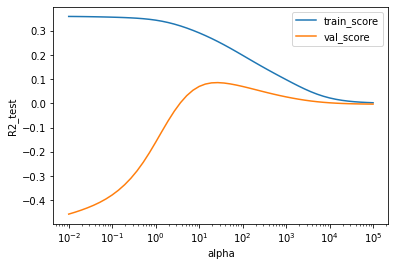

In [100]:
plt.plot(alpha_list,train_scores,label='train_score')
plt.plot(alpha_list,val_scores,label='val_score');
plt.legend();
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2_test');

In [112]:
clf = Ridge(alpha=3000)
clf.fit(X_scaled_train,y_train)
print(clf.score(X_scaled_train, y_train))
print(clf.score(X_scaled_test,y_test))

0.058078759357935605
0.04348936247357382


In [102]:
# Index of highest val scores
np.argmax(val_scores)

24

In [103]:
# Alpha of that index
alpha_list[24]

26.826957952797247

Text(0, 0.5, 'residuals')

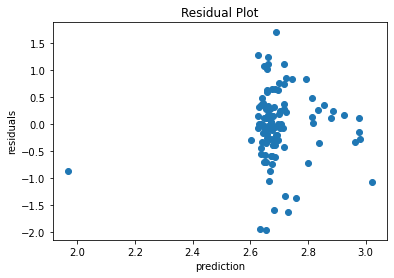

In [118]:
# Residual Plot
clf = Ridge(alpha=3000)
clf.fit(X_scaled_train,y_train)
pred = clf.predict(X_scaled_test)
res = y_test - pred
plt.scatter(pred, res)
plt.title('Residual Plot')
plt.xlabel('prediction')
plt.ylabel('residuals')

In [119]:
# Mean Absolute Error (remember, standardized data)
def mae(res):
    return np.mean(np.abs(res))

mae(res)

0.46803422478636664

In [120]:
clf = Ridge(alpha=3000)
clf.fit(X_scaled_train,y_train)
list(zip(X_scaled_test.columns, clf.coef_))

[('1', 0.0),
 ('p_topkey3', -0.0031361231164727297),
 ('p_rcorner3', -0.004081405771880674),
 ('p_lcorner3', 0.002959698517160199),
 ('p_paint', -0.0015229124112133103),
 ('r_outside_inside', -0.0021179810249567343),
 ('win_prev', 0.0053707808186952725),
 ('season06', 0.006047094678842214),
 ('season07', 0.0034849418044703697),
 ('season09', 0.002287330833168273),
 ('season14', -0.0003455104123154363),
 ('p_topkey3^2', -0.004265733346651133),
 ('p_topkey3 p_rcorner3', -0.004714206193279074),
 ('p_topkey3 p_lcorner3', 0.0028926483208052143),
 ('p_topkey3 p_paint', -0.002201775670026853),
 ('p_topkey3 r_outside_inside', -0.0017393717629459909),
 ('p_topkey3 win_prev', 0.0009537358456790666),
 ('p_topkey3 season06', 0.005744636790661989),
 ('p_topkey3 season07', 0.0029902791827417195),
 ('p_topkey3 season09', 0.002466875891512751),
 ('p_topkey3 season14', -0.0010280866104730997),
 ('p_rcorner3^2', -0.010053217359150813),
 ('p_rcorner3 p_lcorner3', 0.0038768618502292847),
 ('p_rcorner3 p_p

In [122]:
# Transform coefficients

# win_prev
print(np.exp(0.0053707808186952725))
# season06
print(np.exp(0.006047094678842214))
# p_topkey3 x season06
print(np.exp(0.005744636790661989))
# win_prev x season06
print(np.exp(0.006234456967704555))

1.0053852293169878
1.006065415266028
1.0057611688583379
1.006253931644856
